In [1]:
%pylab inline
import pandas

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# uncomment to downlaod data if needed
#!curl -O http://theia.datasd.org.s3.amazonaws.com/waze_data.csv

# Units: 
Length – Meters 
Speed – km/hour 
Delay – seconds (corresponding to freeflow traffic) If delay is positive, means delay.  \n
Delay of -1 means street blocked/closed.  \n
Level – rating 1 through 5 indicating level of congestion. 0 means free, 5 means bumper to bumper/stopped. \n
Road type – unsure. Looks like 4 is freeway. \n
Line string – format is called wkt (well known text) and defines a line – how long traffic is. We can upload this \n data to a software (some open source options) and visualize on map. Volkan to give us some resources: QGIS, ArcGis \n only for windows and UI only. Can extract the street network from MapsN. \n
New feature: May want to have binary feature based on Level (e.g. 3 and above = traffic, below = no traffic). \n

In [2]:
df = pandas.read_csv("waze_data.csv")

In [3]:
df.columns

Index([u'uuid', u'waze_timestamp', u'street', u'start_node', u'end_node',
       u'city', u'length', u'delay', u'speed', u'level', u'road_type',
       u'geom'],
      dtype='object')

In [4]:
df.dtypes

uuid                int64
waze_timestamp     object
street             object
start_node         object
end_node           object
city               object
length              int64
delay               int64
speed             float64
level               int64
road_type           int64
geom               object
dtype: object

In [5]:
df.isnull().any()

uuid              False
waze_timestamp    False
street             True
start_node         True
end_node           True
city               True
length            False
delay             False
speed             False
level             False
road_type         False
geom              False
dtype: bool

In [8]:
df.shape

(7592, 12)

In [9]:
print 'min waze_timestamp:'
print df.waze_timestamp.min()

print '\nmax waze_timestamp:'
print df.waze_timestamp.max()

min waze_timestamp:
2017-02-08 16:12:54

max waze_timestamp:
2017-06-12 15:16:17


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uuid,7592.0,3.335266e+08,8.257128e+07,36971633.0,3.536213e+08,3.578661e+08,3.626264e+08,3.789336e+08
length,7592.0,7.639548e+02,9.932004e+02,26.0,3.140000e+02,5.430000e+02,8.570000e+02,2.336500e+04
delay,7592.0,1.230119e+02,1.072193e+02,-1.0,7.900000e+01,1.020000e+02,1.370000e+02,1.755000e+03
speed,7592.0,3.742038e+00,2.980785e+00,0.0,1.874306e+00,3.169444e+00,4.828472e+00,2.198611e+01
level,7592.0,3.141728e+00,9.366371e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
road_type,7592.0,4.642518e+00,2.388435e+00,1.0,2.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00


In [10]:
df.head(10)

,uuid,waze_timestamp,street,start_node,end_node,city,length,delay,speed,level,road_type,geom
0,348279374,2017-02-24 08:47:01,Rosecrans St,NaN,Lytton St,"San Diego, CA",934,464,1.755556,4,6,0102000020E610000015000000EF39B01C214D5DC015C6...
1,348764673,2017-02-24 08:47:01,to SR-163 N,NaN,SR-163 N,"San Diego, CA",487,101,3.922222,3,4,0102000020E61000000E000000D15B3CBCE7495DC05F29...
2,348536095,2017-02-24 08:47:01,Via Rancho Pkwy,NaN,to I-15 N,"Escondido, CA",637,90,4.541667,2,7,0102000020E610000005000000FE8172DBBE445DC04DA0...
3,40791027,2017-02-24 08:51:49,Hoover Ave,NaN,NaN,"National City, CA",100,-1,0.000000,5,1,0102000020E610000002000000FE7E315BB2465DC0DD43...
4,36971633,2017-02-24 08:51:49,Hoover Ave,NaN,NaN,"National City, CA",100,-1,0.000000,5,1,0102000020E610000002000000C66D3480B7465DC08196...
5,353993967,2017-02-24 08:51:49,Civic Center Dr,NaN,to I-5 N,"National City, CA",303,114,1.850000,3,7,0102000020E61000000400000091D6187442475DC062D9...
6,349622483,2017-02-24 08:51:49,Civic Center Dr,NaN,Harbor Dr,"National City, CA",252,98,1.908333,3,7,0102000020E610000003000000CC5D4BC807475DC0F224...
7,345243533,2017-02-24 08:51:49,I-5 N,NaN,I-5 N,"National City, CA",3118,302,7.672222,3,3,0102000020E610000020000000439259BDC3465DC08D7C...
8,349775633,2017-02-24 08:51:49,Beyer Blvd,NaN,to SR-905 W,"San Diego, CA",475,128,2.797222,3,7,0102000020E610000007000000AA6400A8E2435DC03E24...
9,349685702,2017-02-24 08:51:49,La Media Rd,NaN,Birch Rd,"Chula Vista, CA",1462,118,6.416667,2,2,0102000020E610000014000000F530B43A393F5DC01495...


In [9]:
# min_num = 1000
# for i in range(len(df)):
#     if len(df['geom'][i])< min_num:
#         min_num = len(df['geom'][i])
           
# print "minum = ", min_num

In [ ]:
# for i in range(len(df)):
#     if len(df['geom'][i]) == min_num:
#         print df['geom'][i]
#         break
#0102000020E610000002000000FE7E315BB2465DC0DD43C2F7FE544040C66D3480B7465DC08196AE601B554040

In [10]:
# Seems to take enormous amount of time
from pandas.plotting import scatter_matrix

In [69]:
df1 = df.drop(df['delay']==-1)

In [70]:
len(df1)

2260988

In [11]:
df.iloc[:5,1:12]

,waze_timestamp,street,start_node,end_node,city,length,delay,speed,level,road_type,geom
0,2017-02-24 08:47:01,Rosecrans St,NaN,Lytton St,"San Diego, CA",934,464,1.755556,4,6,0102000020E610000015000000EF39B01C214D5DC015C6...
1,2017-02-24 08:47:01,to SR-163 N,NaN,SR-163 N,"San Diego, CA",487,101,3.922222,3,4,0102000020E61000000E000000D15B3CBCE7495DC05F29...
2,2017-02-24 08:47:01,Via Rancho Pkwy,NaN,to I-15 N,"Escondido, CA",637,90,4.541667,2,7,0102000020E610000005000000FE8172DBBE445DC04DA0...
3,2017-02-24 08:51:49,Hoover Ave,NaN,NaN,"National City, CA",100,-1,0.000000,5,1,0102000020E610000002000000FE7E315BB2465DC0DD43...
4,2017-02-24 08:51:49,Hoover Ave,NaN,NaN,"National City, CA",100,-1,0.000000,5,1,0102000020E610000002000000C66D3480B7465DC08196...


In [72]:
#df[df["road_type"]==6].head(20)

In [13]:
#scatter_matrix(df.iloc[0:10000,1:11],alpha=0.03, figsize=(10, 10), diagonal='kde');

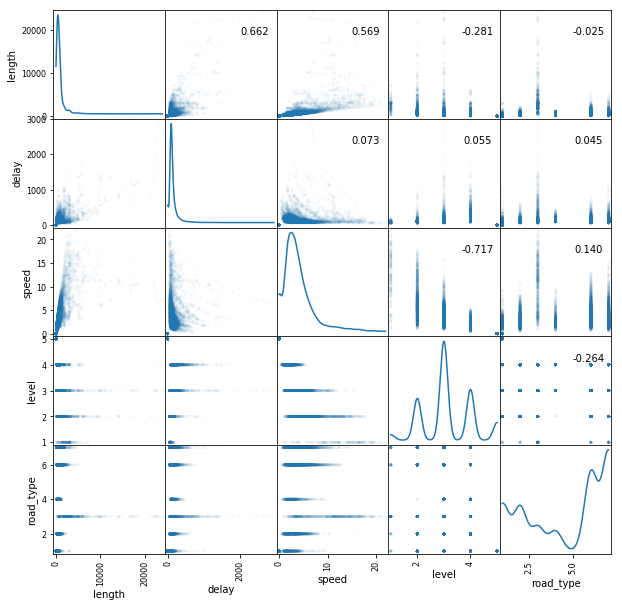

In [71]:
axes = scatter_matrix(df1.iloc[0:10000,1:11],alpha=0.03, figsize=(10, 10), diagonal='kde');
corr = df1.iloc[0:10000,1:11].corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

In [11]:
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point

from geoalchemy2 import functions
from shapely import wkb, wkt
from binascii import unhexlify
#geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
crs = {'init': 'epsg:4326'}

def convert_to_wkt(hexn):
    binary = unhexlify(bytes(hexn))
    point = wkb.loads(binary)
    return wkt.dumps(point)

small_df = df.iloc[1:10, 1:12]
# Convert `'geom'` column in GeoDataFrame `gdf` to hex
    # Note that following this step, the GeoDataFrame is just a regular DataFrame
    # because it does not have a geometry column anymore. Also note that
    # it is assumed the `'geom'` column is correctly datatyped.
small_df['geometry'] = small_df['geom'].apply(convert_to_wkt)

In [27]:
#df[:,'geometry'] = df[:,'geom']
#print(list(small_df['geometry']))

In [12]:
gdf = GeoDataFrame(small_df['geometry'], crs=crs)
#gdf = GeoDataFrame(small_df)

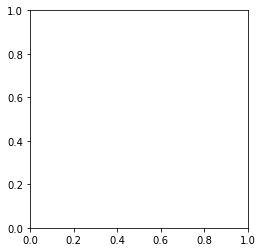

In [13]:
gdf.plot()

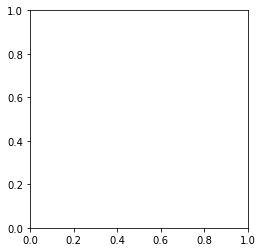

In [14]:
#print(gdf)
# GeoDataFrame.plot(gdf, column='geometry', colormap=None, alpha=0.5, \
#                             categorical=False, legend=False, axes=None)
GeoDataFrame.plot(gdf, column='geometry', cmap=None, alpha=0.5, \
                            categorical=False, legend=False, ax=None)

In [51]:
# gdf.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
# gdf.to_file('MyGeometries.shp', driver='ESRI Shapefile')

In [15]:
from geopandas import GeoSeries
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]) 
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)]) 
g = GeoSeries([p1, p2, p3])
g

0    Poly((0, 0) ...)
1    Poly((0, 0) ...)
2    Poly((2, 0) ...)
dtype: object

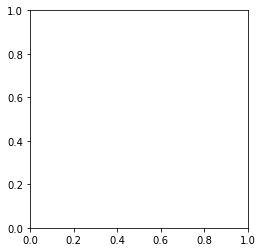

In [16]:
g.plot()

## Special Events

In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

In [20]:
events_dictionary = pandas.read_csv('data/special_events_listings_dictionary.csv')
events_df = pandas.read_csv('data/special_events_list_datasd.csv')

In [21]:
events_df.shape

(2670, 15)

In [22]:
events_dictionary

,Field,Description,Possible values
0,event_id,Unique identifier of event,NaN
1,event_title,Title of event,NaN
2,event_subtitle,Subtitle of event,NaN
3,event_type,Type of event,"festival, museum, music, other, parades, sports"
4,event_desc,Description of event,NaN
5,event_host,Event host organization,NaN
6,event_loc,Description of location,NaN
7,event_start,Start date and time,NaN
8,event_end,End date and time,NaN
9,exp_attendance,Expected number of attendess,NaN


In [64]:
','.join(events_dictionary.columns.values)

'Field,Description,Possible values'

In [23]:
events_df.columns.values

array(['event_title', 'event_id', 'event_subtitle', 'event_type',
       'event_desc', 'event_loc', 'event_start', 'event_end',
       'exp_attendance', 'exp_participants', 'event_host', 'event_url',
       'event_address', 'latitude', 'longitude'], dtype=object)

In [24]:
events_df.describe()

,event_id,latitude,longitude
count,2670.000000,2293.000000,2293.000000
mean,48422.980524,32.751255,-117.168504
std,897.173372,0.054374,0.055486
min,46076.000000,32.548140,-117.301825
25%,47739.250000,32.721301,-117.208660
50%,48422.500000,32.747671,-117.161084
75%,49155.750000,32.752780,-117.136062
max,49964.000000,33.191478,-116.957910


In [25]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 2669
Data columns (total 15 columns):
event_title         2670 non-null object
event_id            2670 non-null int64
event_subtitle      75 non-null object
event_type          2670 non-null object
event_desc          2670 non-null object
event_loc           2670 non-null object
event_start         2670 non-null object
event_end           2669 non-null object
exp_attendance      2649 non-null object
exp_participants    2538 non-null object
event_host          2669 non-null object
event_url           2098 non-null object
event_address       2293 non-null object
latitude            2293 non-null float64
longitude           2293 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 313.0+ KB


In [62]:
# check max length of string columns
for col in events_df.columns:
    vals = events_df[col]
    vals = vals[vals.notnull()]
    if dtype(vals) == 'object':
        print col, 'max length is', np.max(np.array([len(elem) for elem in vals.values if elem != 'NaN']))

event_title max length is 50
event_subtitle max length is 15
event_type max length is 8
event_desc max length is 300
event_loc max length is 295
event_start max length is 19
event_end max length is 19
exp_attendance max length is 13
exp_participants max length is 9
event_host max length is 50
event_url max length is 111
event_address max length is 47


In [26]:
events_df.head()

,event_title,event_id,event_subtitle,event_type,event_desc,event_loc,event_start,event_end,exp_attendance,exp_participants,event_host,event_url,event_address,latitude,longitude
0,2018 Hillcrest Farmers' Market (Sundays),49953,NaN,FARMERS,This farmer's market in Hillcrest offers an ar...,DMV parking lot at 3690 Normal Street ~ Normal...,2018-12-30 09:00:00,2018-12-30 14:00:00,"2,000",400,Hillcrest Business Association,www.hillcrestfarmersmarket.com,3690 Normal Street,32.748542,-117.149901
1,Holiday Bowl 5K,49893,NaN,ATHLETIC,This nationally televised 5K run/walk is a kic...,Harbor Dr./Ash St. - Harbor Dr. - walkway - Em...,2018-12-28 09:45:00,2018-12-28 12:00:00,"1,000",100,KOZ Events,www.kozenterprises.com,Harbor Drive & Ash Streeet,32.709384,-117.162865
2,2018 Hillcrest Farmers' Market (Sundays),49952,NaN,FARMERS,This farmer's market in Hillcrest offers an ar...,DMV parking lot at 3690 Normal Street ~ Normal...,2018-12-23 09:00:00,2018-12-23 14:00:00,"2,000",400,Hillcrest Business Association,www.hillcrestfarmersmarket.com,3690 Normal Street,32.748542,-117.149901
3,Curbside Bites Food Truck Markets - Downtown L...,49831,NaN,FARMERS,"Every Wednesday, a caravan of food trucks are ...",B Street between India & Columbia Streets.,2018-12-19 11:00:00,2018-12-19 14:00:00,300,30,Curbside Bites,www.curbsidebites.com,B & India Streets,32.715738,-117.161084
4,2018 Hillcrest Farmers' Market (Sundays),49951,NaN,FARMERS,This farmer's market in Hillcrest offers an ar...,DMV parking lot at 3690 Normal Street ~ Normal...,2018-12-16 09:00:00,2018-12-16 14:00:00,"2,000",400,Hillcrest Business Association,www.hillcrestfarmersmarket.com,3690 Normal Street,32.748542,-117.149901


In [30]:
events_df.event_type.value_counts()

FARMERS     1402
FESTIVAL     685
ATHLETIC     442
PARADES       61
CONCERTS      40
EXHIBITS      37
MUSEUM         3
Name: event_type, dtype: int64

In [53]:
print 'min start date:', min(events_df.event_start.values)
print 'max start date:', max(events_df.event_start.values)

min start date: 2015-10-18 05:00:00
max start date: 2018-12-30 09:00:00


In [51]:
min(events_df.event_start.values)

'2015-10-18 05:00:00'

In [56]:
print len(events_df.event_title.values)
print len(set(events_df.event_title.values))

2670
620


In [60]:
events_df.event_title.value_counts()[:20]

Old Town Artisan's Market                             219
The Mercato: Little Italy's Farmers Market (Sat.)     117
Pacific Beach Tuesday Farmer's Market                 115
City Heights Farmer's Market (Every Saturday)         105
Ocean Beach Certified Farmer's Market (Wednesdays)    104
Curbside Bites Food Truck Markets (Wed. Lunch)        102
Golden Hill Certified Farmer's Market                  99
North Park Farmer's Market                             62
2016 Hillcrest Farmers' Market (Sundays_               52
2017 Hillcrest Farmers' Market (Sundays)               52
Third Avenue Certified Farmer's Market (Sundays)       52
2018 Hillcrest Farmers' Market (Sundays)               52
North Park Thursday Market                             51
Curbside Bites Food Truck Markets - Downtown Lunch     49
The Haunted Trail of Balboa Park (38-Day Event)        48
UTC Farmer's Market (Every Thursday)                   48
The Haunted Hotel (39-Day Event)                       39
Memorial Park 

In [68]:
starts = events_df.event_start.values
ends = events_df.event_end.values

print sum((starts >= '2017-02-08') & (starts <= '2017-06-12'))
print sum((ends >= '2017-02-08') & (ends <= '2017-06-12'))

345
345


In [76]:
events_overlap = events_df[(starts >= '2017-02-08') & (starts <= '2017-06-12')]
events_overlap.shape

(345, 15)

In [77]:
events_overlap.event_type.value_counts()

FARMERS     182
FESTIVAL     79
ATHLETIC     68
EXHIBITS      9
PARADES       7
Name: event_type, dtype: int64

In [72]:
import datetime

starts_strpt = [datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S') for elem in events_df.event_start.values]
ends_strpt = [datetime.datetime.strptime(e, '%Y-%m-%d %H:%M:%S') for e in events_df.event_end.values]

TypeError: strptime() argument 1 must be string, not float

In [73]:
events_df.event_end.isnull().sum()

1

In [74]:
events_df.event_start.isnull().sum()

0